In [1]:
import torch
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CocoCaptions

import matplotlib.pyplot as plt

# Know You Dataset

In [2]:
# Define paths for datasets
data_dir = 'archive'
data_type = 'train2014' # or 'val2014' or 'test2014'
captions_file = f'{data_dir}/captions/annotations/captions_{data_type}.json'
image_dir = f'{data_dir}/train2014/train2014'

# Apply a series of Augmentations to data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define Batch Size for your dataloader
batch_size = 64

dataset = CocoCaptions(root=image_dir, annFile=captions_file, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda batch: list(zip(*batch)))

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!


In [3]:
print(f'The batch size = {batch_size}')
print(f'The number of batches in your dataloader = {len(dataloader)}')
print(f'Image Shape = {dataset[0][0].shape}')

The batch size = 64
The number of batches in your dataloader = 1294
Image Shape = torch.Size([3, 224, 224])


# We Visualize our data from COCO dataset including the captions

1. Closeup of bins of food that include broccoli and bread.
2. A giraffe eating food from the top of the tree.
3. A flower vase is sitting on a porch stand.
4. A zebra grazing on lush green grass in a field.
5. Woman in swim suit holding parasol on sunny day.
6. A couple of men riding horses on top of a green field.
7. They are brave for riding in the jungle on those elephants.
8. a black and silver clock tower at an intersection near a tree
9. A train coming to a stop on the tracks out side.


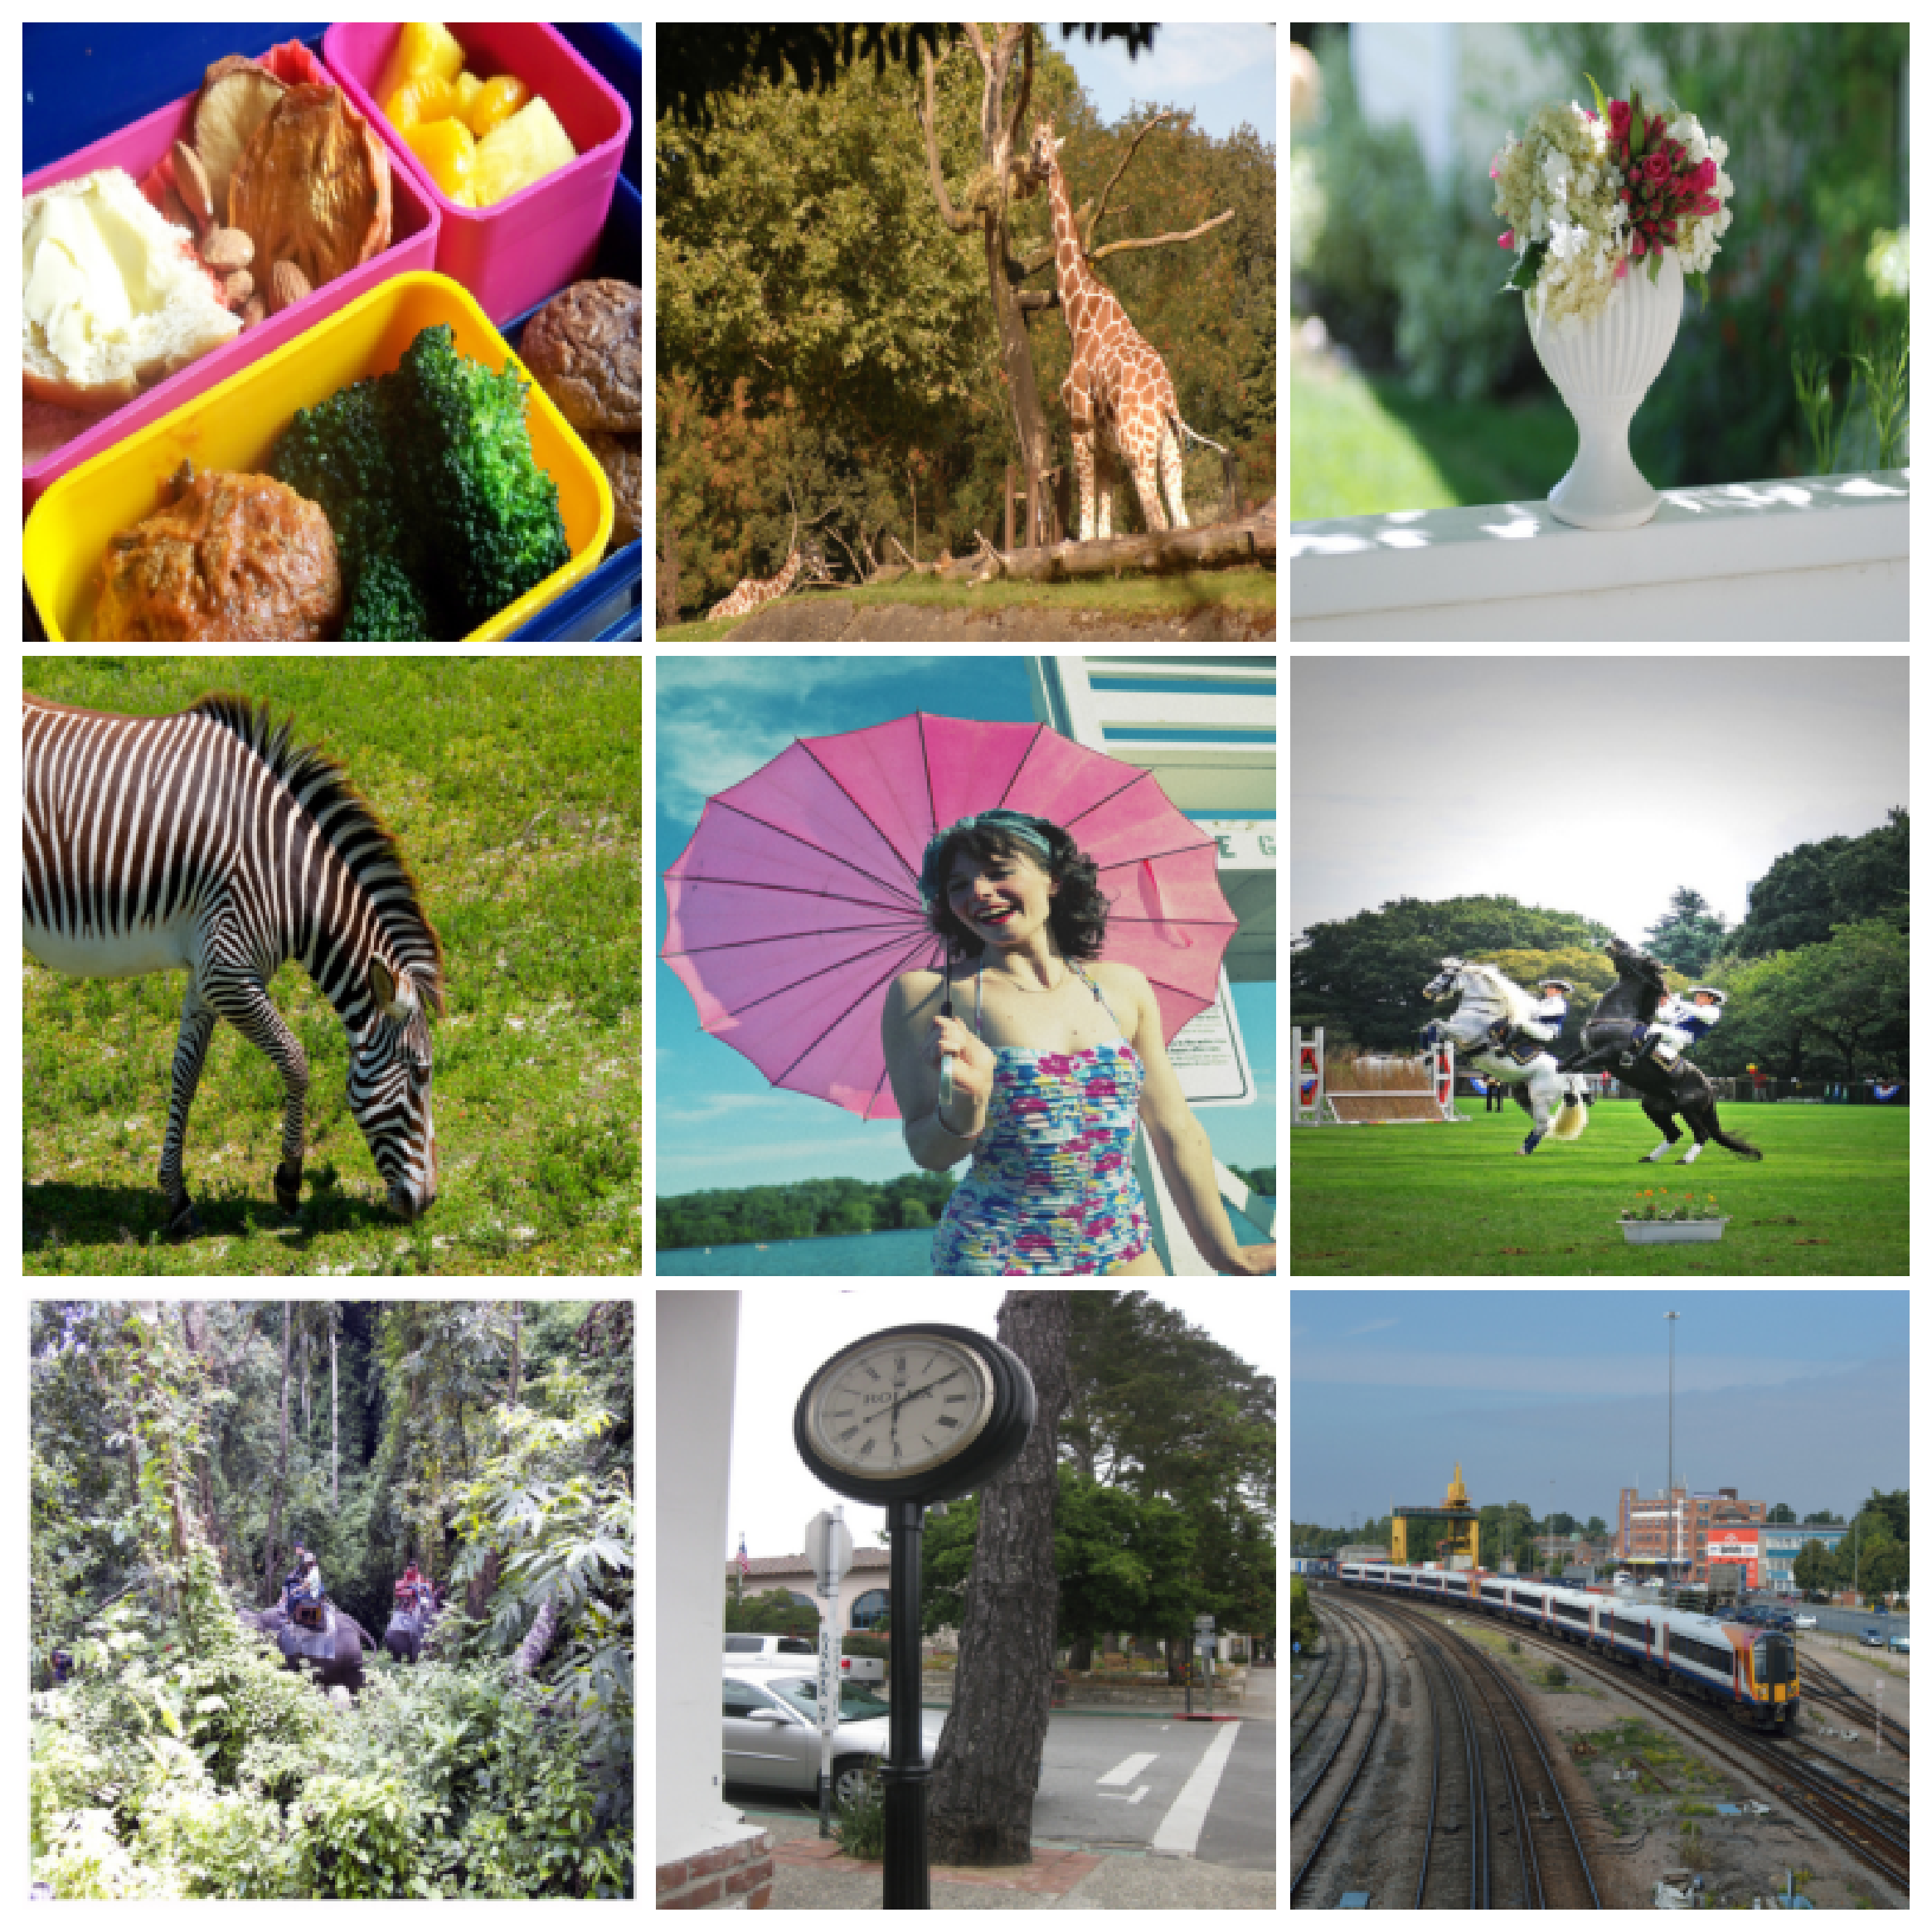

In [4]:
# Extract captions and images from the dataset
captions = [dataset[i][1][0] for i in range(9)]
images = [dataset[i][0] for i in range(9)]

# Create grid of shape 9 * 9
grid_image = torchvision.utils.make_grid(images, nrow=3, padding=5, pad_value=1)

# Iterate through the captions of the images
for idx, caption in enumerate(captions):
    print(f'{idx + 1}. '+caption)

# Display the grid with 9 images
plt.figure(figsize=(30, 30))
plt.imshow(grid_image.permute(1, 2, 0)) # Convert image from CWH to HWC format for matplotlib
plt.axis('off')
plt.show()